Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025 (11).csv
['2024-25']
569


/tmp/ipython-input-13-853255863.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='PLAYER', data=df_final.head(10), palette='plasma')


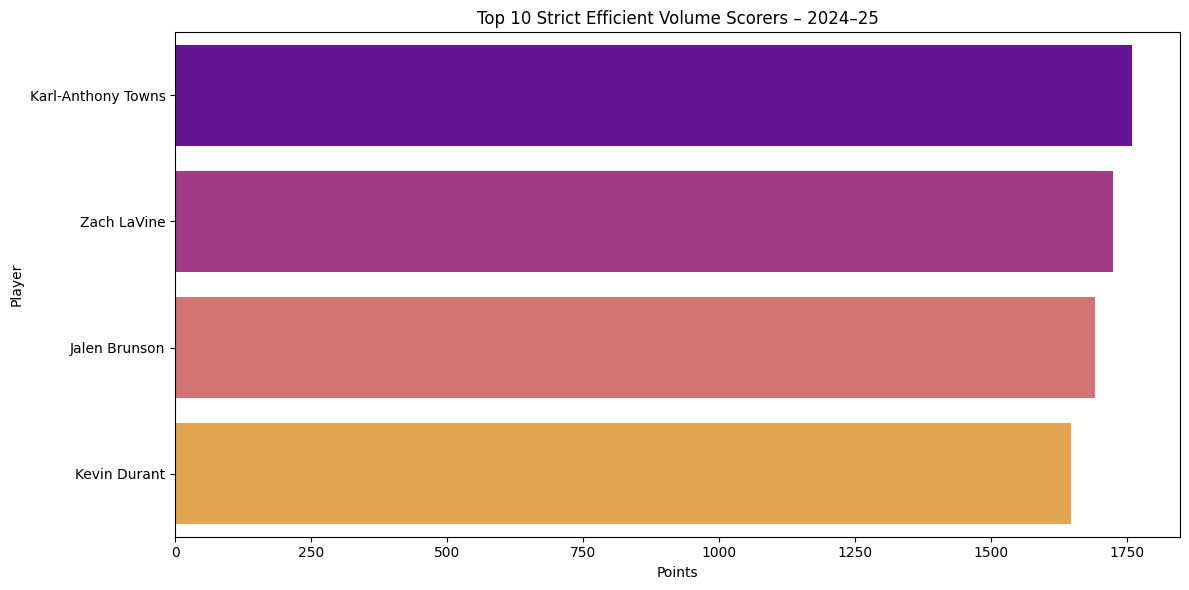

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(df['Year'].unique())

df_2425 = df[df['Year'].astype(str).str.contains('2024')]
print(len(df_2425))

df_filtered = df_2425[
    (df_2425['PTS'] >= 1200) &
    (df_2425['GP'] > 50) &
    (df_2425['MIN'] > 1400) &
    (df_2425['FGM'] >= 400) &
    (df_2425['FGA'] >= 600) &
    (df_2425['FG3M'] >= 100) &
    (df_2425['FTM'] >= 180) &
    (df_2425['FTA'] >= 250) &
    (df_2425['FG_PCT'] >= 0.48) &
    (df_2425['FG3_PCT'] >= 0.38) &
    (df_2425['FT_PCT'] >= 0.82)
]

columns = [
    'PLAYER', 'TEAM', 'GP', 'MIN',
    'FGM', 'FGA', 'FG_PCT',
    'FG3M', 'FG3A', 'FG3_PCT',
    'FTM', 'FTA', 'FT_PCT',
    'PTS'
]

df_final = df_filtered[columns].sort_values(by='PTS', ascending=False).reset_index(drop=True)
df_final.to_csv("filtered_scorers_strict_2024_25.csv", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='PTS', y='PLAYER', data=df_final.head(10), palette='plasma')
plt.title("Top 10 Strict Efficient Volume Scorers – 2024–25")
plt.xlabel("Points")
plt.ylabel("Player")
plt.tight_layout()
plt.savefig("strict_elite_scorers_top10_2024_25.jpg", dpi=300)
plt.show()